# <center>  Python for biologists

# Lecture 5, Files


---

# Two afterwords about previous lectures

## 1. Naming conventions

There two schemes of naming: ***snake_case*** and ***CamelCase***. Do not mix them!!

In Python we use:
 - *snake_case* for variables and functions
 - *CamelCase* for Classes (next semester)
 
So in the first semestr stick to the snake_case for everything you do!
 
How should I create a name for something?
 
 ### Variables
- **Variable: noun** (переменные называем именами существительными)
    - **Collections: plural** (коллекции - множественным числом)
    
Example:
```python
student_id = 1
sequence = 'ATG'

student_ids = [1, 2, 3]
sequences = ('A', 'ATCG', 'ATG')
```

**Do not** inculde data types in the name of the variable:
```python
sequence_str = 'ATG' # BAD
sequence = 'ATG' # GOOD
```

### Functions
- **Functions: verb** (функции называем глаголами)

Example:
```python
def reverse(seq):
    return seq[::-1]

def update_database():
    pass

def plot_histogram():
    pass

def validate_args():
    pass
```

- There some commonly used prefixes:
    + `is_`: mean function returns `bool` (`is_dna`, `isdigit`)
    + `get_`
    + `fetch_`: same as get but means getting from internet
    
**Do not** include function arguments in the function name:
```python
# BAD
def reverse_seq(seq):
    pass

def validate_args(args):
    pass

# GOOD
def reverse(seq):
    pass

def validate(args):
    pass
# or
def validate_args():
    pass
```

## 2. Standard library modules

Here are most used modules in the python standart library:

- sys \*\*
- os \*\*\*
- re \*\*
- os.path \*\*\*, glob, pathlib
- argparse \*
- venv \*
- datetime \*
- itertools, functools \*
- multiprocessing, threading \*
- collections
- copy
- pprint
- typing
- gc

**sys**:
- exit
- getsizeof
- path
- stdin, stdout, stderr \*\*\*

**os**:
- chdir, getcwd
- mkdir
- chmod, chown
- listdir \*\*
- rename
- cpu_count

**os.path**:
- basename
- exist
- isfile, isfile \*
- join \*\*\*
s
- isfile, isfile *
- join ***


## Inspecting OS Filesystem

In [5]:
import os

Listing files in the directory

In [17]:
print(os.listdir()) # in current
print(os.listdir('data')) # in some specific

['.ipynb_checkpoints', 'data', 'Lecture_6_Files.ipynb', 'Python_BI2425_L5_Files.ipynb']
['.ipynb_checkpoints', 'script.py', 'snps.vcf', 'test.fastq']


Check whether the path a file or not (there are the same function for dirs and links)

In [18]:
os.path.isfile('data/snps.vcf') 

True

To construct paths in OS-independent way - use this function

In [19]:
os.path.join('data', 'snps.vcf')

'data/snps.vcf'

In [20]:
out_dir = 'data'
out_file = 'A1_filtered_sorted.txt'

In [21]:
os.path.join(out_dir, out_file)

'data/A1_filtered_sorted.txt'

## Connecting to files - open

In [28]:
file = open('data/script.py')

In [29]:
text = file.read()

In [30]:
type(str)

type

In [31]:
text

'joke = """There are 10 types of people: \n          those who understand binary and \n          those who don\'t."""\n\nif __name__ == "__main__":\n    print(joke)'

Pay attention to '\n' symbols (linebreaks). The `print` function can display it in a nice way

In [32]:
print(text)

joke = """There are 10 types of people: 
          those who understand binary and 
          those who don't."""

if __name__ == "__main__":
    print(joke)


UNIX-like OS: '\n' 

Windows: '\r\n'

### But,
the most important thing to do with file - to close it

In [33]:
file.close()

Due to this fact, in python we work with files using special so-called `context manager`:

In [35]:
with open('data/script.py') as file: # контекстный менеджер
    print(file.read()) # работаем с файлом внутри блока
                          # вне блока файл закрывается 
print('_')
print(file.read()) # тут файл уже закрыт и его чтение дает ошибку

joke = """There are 10 types of people: 
          those who understand binary and 
          those who don't."""

if __name__ == "__main__":
    print(joke)
_


ValueError: I/O operation on closed file.

- В `open` хорошо бы подавать пути через `os.path.join`.
- Читать весь файл единым киричем за раз - не очень хорошо. И работать сложно, и компьютеру может быть больно. Можно читать отдельные строки. Каждый раз читая строку, вы переходите на следующую

In [36]:
data_dir = 'data'
with open(os.path.join(data_dir, 'snps.vcf')) as vcf_file:
    print(vcf_file.readline(), end='')
    print(vcf_file.readline(), end='')

##fileformat=VCFv4.2
##fileDate=20230207


Чтобы вернуться назад, можно попросить питон найти "нулевой" байт в вашем файле и перейти на него. Но так обычно редко приходится делать.

In [37]:
data_dir = 'data'
with open(os.path.join(data_dir, 'snps.vcf')) as vcf_file:
    print(vcf_file.readline(), end='')
    print(vcf_file.readline(), end='')
    print(vcf_file.readline(), end='')
    vcf_file.seek(0)
    print()
    print(vcf_file.readline(), end='')

##fileformat=VCFv4.2
##fileDate=20230207
##source=PLINKv1.90

##fileformat=VCFv4.2


**Задача 1**

> Напечатать самую первую строчку после комментариев в VCF-файле

In [38]:
with open(os.path.join(data_dir, 'snps.vcf')) as vcf_file:
    line = vcf_file.readline()
    while line.startswith('##'):
        line = vcf_file.readline()
    print(line, end='')
    print(vcf_file.readline(), end='')
        
    

#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	FAM001_ID001
Y	2649694	i4000095	T	.	.	.	PR	GT	0/0


Также можно прочитать все строки за раз, но этом может перегрузить память компьютера, будьте аккуратнее

In [39]:
with open(os.path.join(data_dir, 'snps.vcf')) as vcf_file:
    lines = vcf_file.readlines()

In [40]:
lines[:5]

['##fileformat=VCFv4.2\n',
 '##fileDate=20230207\n',
 '##source=PLINKv1.90\n',
 '##contig=<ID=1,length=249218993>\n',
 '##contig=<ID=2,length=243048761>\n']

Но так зато можно работать со строками вполне в привычном для нас режиме

In [41]:
data = []
for line in lines:
    if not line.startswith('#'):
        data.append(line)

In [42]:
data[:10]

['Y\t2649694\ti4000095\tT\t.\t.\t.\tPR\tGT\t0/0\n',
 'Y\t2649696\ti4000093\tN\t.\t.\t.\tPR\tGT\t./.\n',
 'Y\t2655180\trs11575897\tG\t.\t.\t.\tPR\tGT\t0/0\n',
 'Y\t2655248\ti5004371\tG\t.\t.\t.\tPR\tGT\t0/0\n',
 'Y\t2655265\ti5004367\tT\t.\t.\t.\tPR\tGT\t0/0\n',
 'Y\t2655308\ti5004381\tC\t.\t.\t.\tPR\tGT\t0/0\n',
 'Y\t2655319\ti5004386\tA\t.\t.\t.\tPR\tGT\t0/0\n',
 'Y\t2655324\ti5004379\tC\t.\t.\t.\tPR\tGT\t0/0\n',
 'Y\t2655325\ti5004380\tC\t.\t.\t.\tPR\tGT\t0/0\n',
 'Y\t2655328\ti5004382\tT\t.\t.\t.\tPR\tGT\t0/0\n']

На самом деле, **можно итерироваться сразу по файлу!**

In [43]:
with open(os.path.join(data_dir, 'snps.vcf')) as vcf_file:
    for line in vcf_file:
        if not line.startswith('#'):
            print(line)
            break

Y	2649694	i4000095	T	.	.	.	PR	GT	0/0



Давайте посомтрим на нашу строчку. Что нам делать с такой ерундовиной?

In [44]:
line # тут куча всяких технических вещей типо \t (TAB) и \n (перенос строки)

'Y\t2649694\ti4000095\tT\t.\t.\t.\tPR\tGT\t0/0\n'

Откусить символы с конца строки (по дефолту как раз \n): 

In [45]:
line = line.strip()

Разбить строку по символам

In [46]:
line.split('\t')

['Y', '2649694', 'i4000095', 'T', '.', '.', '.', 'PR', 'GT', '0/0']

**Задача 2**

> Из комментариев в VCF-файле достать названия хромосом (ID) и их длины

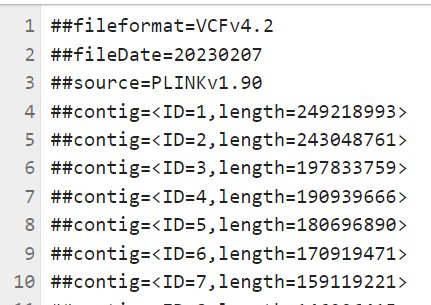

In [47]:
with open(os.path.join(data_dir, 'snps.vcf')) as vcf_file:
    lines = []
    for line in vcf_file:
        if line.startswith('##contig='):
            line = line.strip('>\n')
            line = line.replace('##contig=<ID=', '')
            line = line.split(',length=')
            lines.append(line)


In [48]:
lines

[['1', '249218993'],
 ['2', '243048761'],
 ['3', '197833759'],
 ['4', '190939666'],
 ['5', '180696890'],
 ['6', '170919471'],
 ['7', '159119221'],
 ['8', '146296415'],
 ['9', '141066492'],
 ['10', '135523247'],
 ['11', '134940417'],
 ['12', '133838354'],
 ['13', '115103151'],
 ['14', '107285438'],
 ['15', '102398632'],
 ['16', '90163276'],
 ['17', '81047709'],
 ['18', '78015181'],
 ['19', '59094137'],
 ['20', '62960293'],
 ['21', '48100156'],
 ['22', '51214250'],
 ['Y', '59032810'],
 ['M', '16548']]

### Режимы работы с файлами
- r - чтение (по-умолчанию)
- w - запись
- a - дозапись
- b - бинарные файлы

Можно комбинировать типо `mode='rb'`


Читаем файлы:

In [49]:
with open(os.path.join(data_dir, 'snps.vcf'), mode='r') as vcf_file:
    pass # 

Записываем что-то в файлы

Есть только метод write, он принимает строчку которую надо записать.
Если хотите записывать несколько строк, надо вручную добавлять `\n`.

In [50]:
with open(os.path.join(data_dir, 'text.txt'), mode='w') as file:
    for text in ('a', 'b', 'c'):
        file.write(text + '\n')

Для работы с сжатыми файлами есть специальные средства, например, `gzip`

In [51]:
import gzip
gzip.compress(b'AAAA') # ASCII

b'\x1f\x8b\x08\x001\xb5\xfff\x02\xffsttt\x04\x00\xf1\x08\r\x9b\x04\x00\x00\x00'

In [52]:
with gzip.open(os.path.join(data_dir, 'text.txt'), mode='w') as file:
    file.write(gzip.compress(b'AAAA'))

In [53]:
with gzip.open(os.path.join(data_dir, 'text.txt')) as file:
    print(gzip.decompress(file.read()))

b'AAAA'
